In [38]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

np.random.seed(42)

### Task # 01

In [39]:
class Perceptron:
    def __init__(self, learning_rate=0.1, max_iter=100):
        self.lr = learning_rate
        self.max_iter = max_iter
        self.weights = None
        
    def fit(self, X, y):
        n_features = X.shape[1]
        # Initialize weights randomly
        self.weights = np.random.uniform(-0.5, 0.5, n_features + 1)
        
        # Add bias column
        X_bias = np.c_[np.ones(X.shape[0]), X]
        
        for epoch in range(self.max_iter):
            errors = 0
            for i in range(len(X)):
                # Calculate output
                z = np.dot(X_bias[i], self.weights)
                prediction = 1 if z >= 0 else 0
                
                # Update weights if wrong
                error = y[i] - prediction
                if error != 0:
                    self.weights += self.lr * error * X_bias[i] 
                    errors += 1
            
            if errors == 0:
                print(f"Converged in {epoch+1} iterations")
                break
        
        return self
    
    def predict(self, X):
        X_bias = np.c_[np.ones(X.shape[0]), X]
        return np.where(np.dot(X_bias, self.weights) >= 0, 1, 0)

In [40]:
# Training data for logic gates
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# Truth tables
y_and = np.array([0, 0, 0, 1])
y_or = np.array([0, 1, 1, 1]) 
y_nand = np.array([1, 1, 1, 0])
y_nor = np.array([1, 0, 0, 0])

print("Training data:")
print("X =", X)
print("AND:", y_and)
print("OR:", y_or)
print("NAND:", y_nand)
print("NOR:", y_nor)

Training data:
X = [[0 0]
 [0 1]
 [1 0]
 [1 1]]
AND: [0 0 0 1]
OR: [0 1 1 1]
NAND: [1 1 1 0]
NOR: [1 0 0 0]


In [41]:
# Function to plot decision boundary
def plot_boundary(X, y, model, title):
    plt.figure(figsize=(8, 6))
    
    # Create mesh for decision boundary
    h = 0.01
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Get predictions for mesh
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(mesh_points)
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['red', 'blue']))
    
    # Plot data points
    colors = ['red', 'blue']
    for i in [0, 1]:
        mask = y == i
        plt.scatter(X[mask, 0], X[mask, 1], c=colors[i], s=100, 
                   label=f'Class {i}', edgecolors='black')
    
    # Add labels to points with reduced precision
    for i in range(len(X)):
        plt.annotate(f'({X[i,0]:.1f},{X[i,1]:.1f})', (X[i,0], X[i,1]), 
                    xytext=(5, 5), textcoords='offset points', fontsize=9)
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(f'{title} Gate')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

Training AND Gate...
Converged in 4 iterations


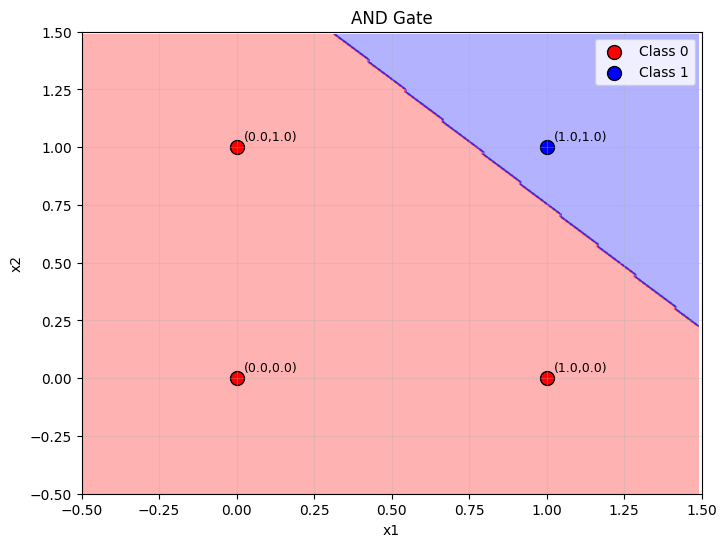

AND Gate Results:
Input: [0 0] -> Expected: 0, Predicted: 0
Input: [0 1] -> Expected: 0, Predicted: 0
Input: [1 0] -> Expected: 0, Predicted: 0
Input: [1 1] -> Expected: 1, Predicted: 1
Weights: [-0.42545988  0.25071431  0.23199394]


In [42]:
# AND Gate
print("Training AND Gate...")
and_model = Perceptron()
and_model.fit(X, y_and)

plot_boundary(X, y_and, and_model, "AND")

# Test the model
predictions = and_model.predict(X)
print("AND Gate Results:")
for i in range(len(X)):
    print(f"Input: {X[i]} -> Expected: {y_and[i]}, Predicted: {predictions[i]}")

print(f"Weights: {and_model.weights}")

Training OR Gate...
Converged in 8 iterations


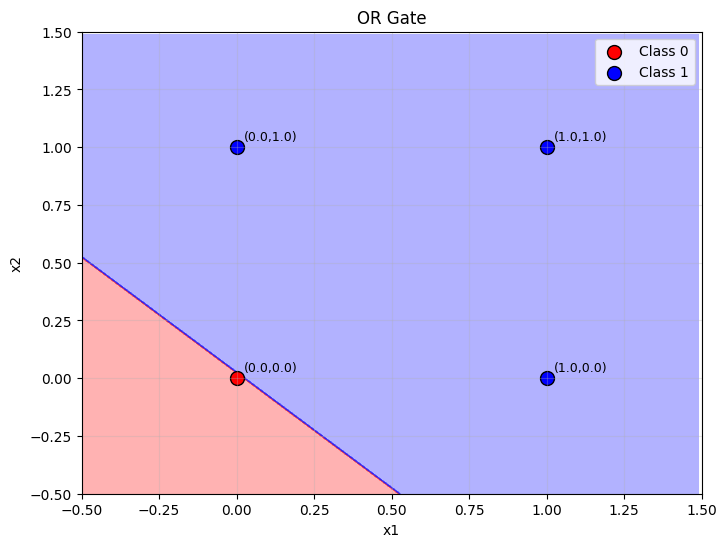

OR Gate Results:
Input: [0 0] -> Expected: 0, Predicted: 0
Input: [0 1] -> Expected: 1, Predicted: 1
Input: [1 0] -> Expected: 1, Predicted: 1
Input: [1 1] -> Expected: 1, Predicted: 1
Weights: [-0.00134152  0.05601864  0.05599452]


In [43]:
# OR Gate
print("Training OR Gate...")
or_model = Perceptron()
or_model.fit(X, y_or)

plot_boundary(X, y_or, or_model, "OR")

predictions = or_model.predict(X)
print("OR Gate Results:")
for i in range(len(X)):
    print(f"Input: {X[i]} -> Expected: {y_or[i]}, Predicted: {predictions[i]}")

print(f"Weights: {or_model.weights}")

Training NAND Gate...
Converged in 11 iterations


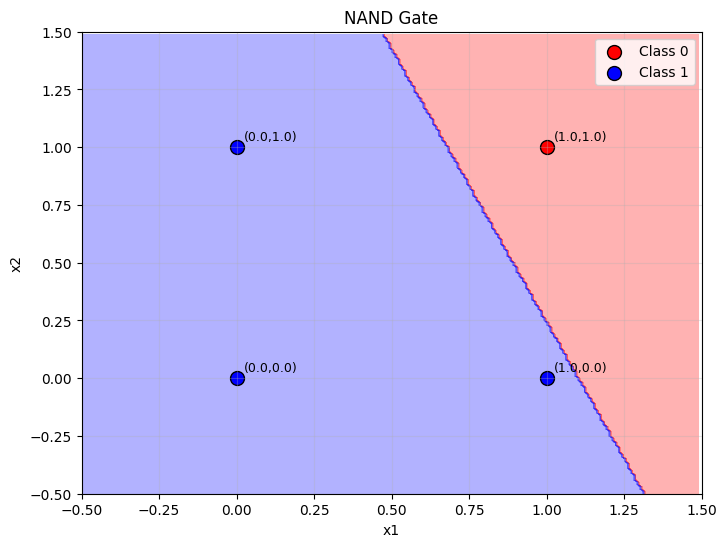

NAND Gate Results:
Input: [0 0] -> Expected: 1, Predicted: 1
Input: [0 1] -> Expected: 1, Predicted: 1
Input: [1 0] -> Expected: 1, Predicted: 1
Input: [1 1] -> Expected: 0, Predicted: 0
Weights: [ 0.25808361 -0.23382385 -0.09888499]


In [44]:
# NAND Gate
print("Training NAND Gate...")
nand_model = Perceptron()
nand_model.fit(X, y_nand)

plot_boundary(X, y_nand, nand_model, "NAND")

predictions = nand_model.predict(X)
print("NAND Gate Results:")
for i in range(len(X)):
    print(f"Input: {X[i]} -> Expected: {y_nand[i]}, Predicted: {predictions[i]}")

print(f"Weights: {nand_model.weights}")

Training NOR Gate...
Converged in 7 iterations


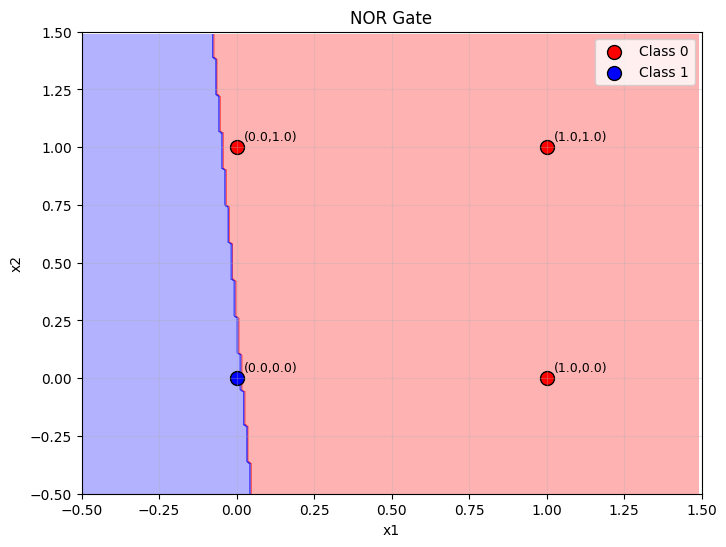

NOR Gate Results:
Input: [0 0] -> Expected: 1, Predicted: 1
Input: [0 1] -> Expected: 0, Predicted: 0
Input: [1 0] -> Expected: 0, Predicted: 0
Input: [1 1] -> Expected: 0, Predicted: 0
Weights: [ 0.00807258 -0.47941551 -0.03009015]


In [45]:
# NOR Gate  
print("Training NOR Gate...")
nor_model = Perceptron()
nor_model.fit(X, y_nor)

plot_boundary(X, y_nor, nor_model, "NOR")

predictions = nor_model.predict(X)
print("NOR Gate Results:")
for i in range(len(X)):
    print(f"Input: {X[i]} -> Expected: {y_nor[i]}, Predicted: {predictions[i]}")

print(f"Weights: {nor_model.weights}")

### Task # 02

In [46]:
# XOR gate using combination of perceptrons
# XOR = (A OR B) AND NOT(A AND B) = (A OR B) AND (A NAND B)

class XORPerceptron:
    def __init__(self):
        self.or_gate = None
        self.nand_gate = None
        self.and_gate = None
        
    def fit(self, X, y):
        # XOR truth table
        y_xor = np.array([0, 1, 1, 0])
        
        # Train OR gate (first layer)
        self.or_gate = Perceptron()
        self.or_gate.fit(X, y_or)
        
        # Train NAND gate (first layer) 
        self.nand_gate = Perceptron()
        self.nand_gate.fit(X, y_nand)
        
        # Create inputs for second layer (outputs of OR and NAND)
        or_outputs = self.or_gate.predict(X)
        nand_outputs = self.nand_gate.predict(X)
        layer2_inputs = np.column_stack([or_outputs, nand_outputs])
        
        # Train AND gate for second layer
        self.and_gate = Perceptron()
        self.and_gate.fit(layer2_inputs, y_xor)
        
        print("XOR network trained successfully!")
        
    def predict(self, X):
        # Get outputs from first layer
        or_outputs = self.or_gate.predict(X)
        nand_outputs = self.nand_gate.predict(X)
        
        # Combine outputs for second layer
        layer2_inputs = np.column_stack([or_outputs, nand_outputs])
        
        # Final prediction from AND gate
        return self.and_gate.predict(layer2_inputs)

# XOR truth table
y_xor = np.array([0, 1, 1, 0])
print("XOR truth table:", y_xor)

XOR truth table: [0 1 1 0]


In [47]:
# Train XOR gate
print("Training XOR Gate...")
xor_model = XORPerceptron()
xor_model.fit(X, y_xor)

# Test the XOR model
predictions = xor_model.predict(X)
print("XOR Gate Results:")
for i in range(len(X)):
    print(f"Input: {X[i]} -> Expected: {y_xor[i]}, Predicted: {predictions[i]}")

# Check accuracy
accuracy = np.mean(predictions == y_xor) * 100
print(f"XOR Accuracy: {accuracy:.1f}%")

Training XOR Gate...
Converged in 11 iterations
Converged in 7 iterations
Converged in 6 iterations
XOR network trained successfully!
XOR Gate Results:
Input: [0 0] -> Expected: 0, Predicted: 0
Input: [0 1] -> Expected: 1, Predicted: 1
Input: [1 0] -> Expected: 1, Predicted: 1
Input: [1 1] -> Expected: 0, Predicted: 0
XOR Accuracy: 100.0%


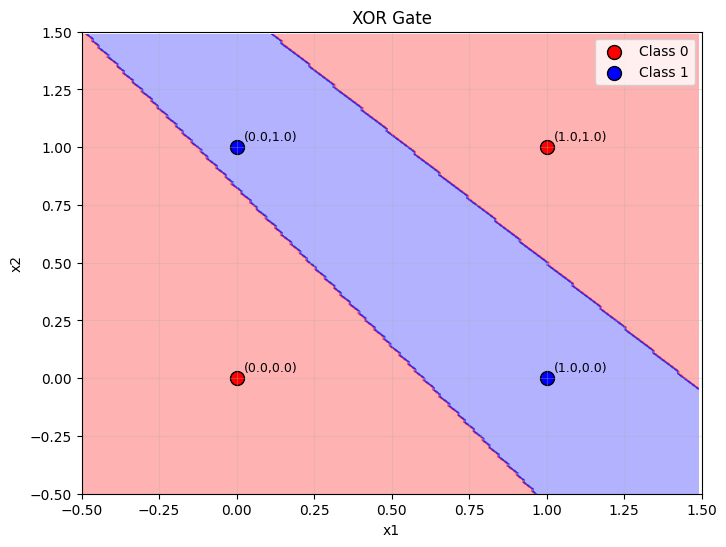


Intermediate gate outputs:
Input | OR | NAND | XOR
-------------------------
[0 0] | 0  |  1   | 0
[0 1] | 1  |  1   | 1
[1 0] | 1  |  1   | 1
[1 1] | 1  |  0   | 0

XOR = (A OR B) AND (A NAND B)


In [48]:
# Plot XOR decision boundary (similar to other gates)
plot_boundary(X, y_xor, xor_model, "XOR")

# Show the intermediate outputs
print("\nIntermediate gate outputs:")
or_out = xor_model.or_gate.predict(X)
nand_out = xor_model.nand_gate.predict(X)

print("Input | OR | NAND | XOR")
print("-" * 25)
for i in range(len(X)):
    print(f"{X[i]} | {or_out[i]}  |  {nand_out[i]}   | {predictions[i]}")

print(f"\nXOR = (A OR B) AND (A NAND B)")

In [49]:
# Compare: Single perceptron vs Multi-layer for XOR
print("Trying single perceptron on XOR:")
single_xor = Perceptron()
single_xor.fit(X, y_xor)

single_pred = single_xor.predict(X)
print("Single perceptron XOR results:")
for i in range(len(X)):
    print(f"{X[i]} -> {single_pred[i]} (expected {y_xor[i]})")

accuracy = np.mean(single_pred == y_xor) * 100
print(f"Accuracy: {accuracy}%")
print("Single perceptron can't solve XOR!")

Trying single perceptron on XOR:
Single perceptron XOR results:
[0 0] -> 1 (expected 0)
[0 1] -> 1 (expected 1)
[1 0] -> 0 (expected 1)
[1 1] -> 0 (expected 0)
Accuracy: 50.0%
Single perceptron can't solve XOR!


### Task # 03

In [50]:
# Create sample data for 10 people (height in cm, weight in kg)
# Labels: 1 = healthy, -1 = overweight

# Sample height and weight data
height = np.array([165, 170, 180, 160, 175, 155, 185, 162, 178, 168])  # cm
weight = np.array([55, 65, 85, 50, 70, 45, 95, 58, 88, 75])           # kg

# Create feature matrix (height, weight)
X_health = np.column_stack([height, weight])

# Labels based on rough BMI classification
# BMI = weight / (height/100)^2
# Healthy if BMI < 25, overweight if BMI >= 25
labels = []
for i in range(len(height)):
    bmi = weight[i] / ((height[i]/100)**2)
    if bmi < 25:
        labels.append(1)   # healthy
    else:
        labels.append(-1)  # overweight

y_health = np.array(labels)

print("Health Classification Data:")
print("Person | Height(cm) | Weight(kg) | BMI  | Label")
print("-" * 45)
for i in range(len(height)):
    bmi = weight[i] / ((height[i]/100)**2)
    status = "Healthy" if y_health[i] == 1 else "Overweight"
    print(f"  {i+1:2d}   |    {height[i]:3d}     |    {weight[i]:2d}     |{bmi:5.1f} | {y_health[i]:2d} ({status})")

print(f"\nFeatures shape: {X_health.shape}")
print(f"Labels: {y_health}")

Health Classification Data:
Person | Height(cm) | Weight(kg) | BMI  | Label
---------------------------------------------
   1   |    165     |    55     | 20.2 |  1 (Healthy)
   2   |    170     |    65     | 22.5 |  1 (Healthy)
   3   |    180     |    85     | 26.2 | -1 (Overweight)
   4   |    160     |    50     | 19.5 |  1 (Healthy)
   5   |    175     |    70     | 22.9 |  1 (Healthy)
   6   |    155     |    45     | 18.7 |  1 (Healthy)
   7   |    185     |    95     | 27.8 | -1 (Overweight)
   8   |    162     |    58     | 22.1 |  1 (Healthy)
   9   |    178     |    88     | 27.8 | -1 (Overweight)
  10   |    168     |    75     | 26.6 | -1 (Overweight)

Features shape: (10, 2)
Labels: [ 1  1 -1  1  1  1 -1  1 -1 -1]


In [51]:
# Convert labels to {0, 1} to use with existing Perceptron class
# Healthy (originally 1) -> 1, Overweight (originally -1) -> 0
y_health_binary = np.where(y_health == 1, 1, 0)

print("Converting labels for existing Perceptron class:")
print("Original labels (1=healthy, -1=overweight):", y_health)
print("Binary labels (1=healthy, 0=overweight):", y_health_binary)

# Train using existing Perceptron class
print("\nTraining Health Classifier using existing Perceptron...")
health_model = Perceptron(learning_rate=0.01, max_iter=1000)
health_model.fit(X_health, y_health_binary)

# Test the model
predictions = health_model.predict(X_health)
print("\nHealth Classification Results:")
for i in range(len(X_health)):
    status_pred = "Healthy" if predictions[i] == 1 else "Overweight"
    status_actual = "Healthy" if y_health_binary[i] == 1 else "Overweight"
    correct = "✓" if predictions[i] == y_health_binary[i] else "✗"
    print(f"Person {i+1}: {X_health[i]} -> Predicted: {predictions[i]} ({status_pred}), Actual: {y_health_binary[i]} ({status_actual}) {correct}")

# Calculate accuracy
accuracy = np.mean(predictions == y_health_binary) * 100
print(f"\nAccuracy: {accuracy:.1f}%")

Converting labels for existing Perceptron class:
Original labels (1=healthy, -1=overweight): [ 1  1 -1  1  1  1 -1  1 -1 -1]
Binary labels (1=healthy, 0=overweight): [1 1 0 1 1 1 0 1 0 0]

Training Health Classifier using existing Perceptron...
Converged in 8 iterations

Health Classification Results:
Person 1: [165  55] -> Predicted: 1 (Healthy), Actual: 1 (Healthy) ✓
Person 2: [170  65] -> Predicted: 1 (Healthy), Actual: 1 (Healthy) ✓
Person 3: [180  85] -> Predicted: 0 (Overweight), Actual: 0 (Overweight) ✓
Person 4: [160  50] -> Predicted: 1 (Healthy), Actual: 1 (Healthy) ✓
Person 5: [175  70] -> Predicted: 1 (Healthy), Actual: 1 (Healthy) ✓
Person 6: [155  45] -> Predicted: 1 (Healthy), Actual: 1 (Healthy) ✓
Person 7: [185  95] -> Predicted: 0 (Overweight), Actual: 0 (Overweight) ✓
Person 8: [162  58] -> Predicted: 1 (Healthy), Actual: 1 (Healthy) ✓
Person 9: [178  88] -> Predicted: 0 (Overweight), Actual: 0 (Overweight) ✓
Person 10: [168  75] -> Predicted: 0 (Overweight), Actual:

Scaled health data for plotting:
Original range - Height: 155 to 185
Original range - Weight: 45 to 95
Scaled to [0,1] range for consistent plotting
Converged in 43 iterations


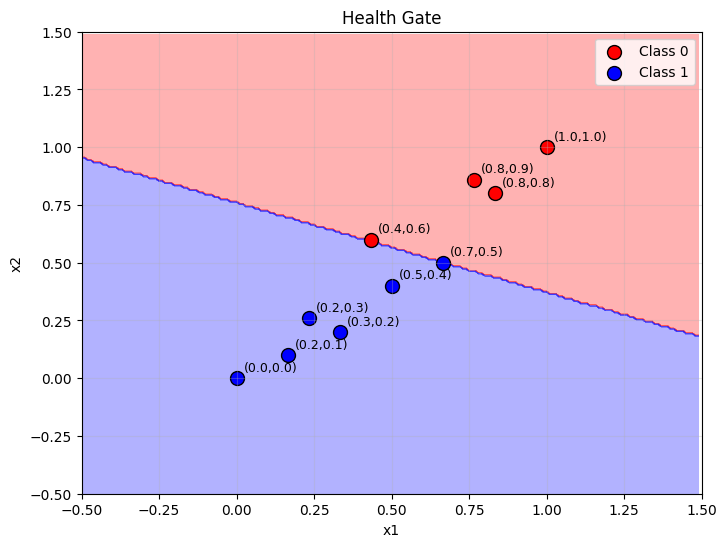


Data point mapping:
P1: Height=165cm, Weight=55kg -> (0.3, 0.2) [Healthy]
P2: Height=170cm, Weight=65kg -> (0.5, 0.4) [Healthy]
P3: Height=180cm, Weight=85kg -> (0.8, 0.8) [Overweight]
P4: Height=160cm, Weight=50kg -> (0.2, 0.1) [Healthy]
P5: Height=175cm, Weight=70kg -> (0.7, 0.5) [Healthy]
P6: Height=155cm, Weight=45kg -> (0.0, 0.0) [Healthy]
P7: Height=185cm, Weight=95kg -> (1.0, 1.0) [Overweight]
P8: Height=162cm, Weight=58kg -> (0.2, 0.3) [Healthy]
P9: Height=178cm, Weight=88kg -> (0.8, 0.9) [Overweight]
P10: Height=168cm, Weight=75kg -> (0.4, 0.6) [Overweight]

Testing with new data points:
Height: 172cm, Weight: 80kg, BMI: 27.0 -> Overweight
Height: 150cm, Weight: 40kg, BMI: 17.8 -> Healthy
Height: 190cm, Weight: 100kg, BMI: 27.7 -> Overweight

Original model weights: [-0.01393002  1.97517596 -4.85032622]


In [53]:
# Plot health classification using existing plot_boundary function
# Need to scale data to fit in [0,1] range like logic gates
X_scaled = (X_health - X_health.min(axis=0)) / (X_health.max(axis=0) - X_health.min(axis=0))
print("Scaled health data for plotting:")
print("Original range - Height:", X_health[:,0].min(), "to", X_health[:,0].max())
print("Original range - Weight:", X_health[:,1].min(), "to", X_health[:,1].max())
print("Scaled to [0,1] range for consistent plotting")

# Train a model on scaled data for plotting
health_scaled_model = Perceptron(learning_rate=0.01, max_iter=1000)
health_scaled_model.fit(X_scaled, y_health_binary)

# Use existing plot_boundary function
plot_boundary(X_scaled, y_health_binary, health_scaled_model, "Health")

# Show the mapping with reduced precision
print("\nData point mapping:")
for i in range(len(X_health)):
    status = "Healthy" if y_health_binary[i] == 1 else "Overweight"
    print(f"P{i+1}: Height={X_health[i,0]}cm, Weight={X_health[i,1]}kg -> ({X_scaled[i,0]:.1f}, {X_scaled[i,1]:.1f}) [{status}]")

# Test with original data
print("\nTesting with new data points:")
test_heights = [172, 150, 190]
test_weights = [80, 40, 100]
test_X = np.column_stack([test_heights, test_weights])

test_predictions = health_model.predict(test_X)
for i in range(len(test_X)):
    status = "Healthy" if test_predictions[i] == 1 else "Overweight" 
    bmi = test_weights[i] / ((test_heights[i]/100)**2)
    print(f"Height: {test_heights[i]}cm, Weight: {test_weights[i]}kg, BMI: {bmi:.1f} -> {status}")

print(f"\nOriginal model weights: {health_model.weights}")

### Task # 04

In [54]:
# Create sample weather data for classification
# Features: humidity (%), atmospheric pressure (hPa)
# Labels: 1 = rainy, -1 = non-rainy

# Sample weather data for 12 days
humidity = np.array([85, 45, 90, 30, 75, 40, 95, 35, 80, 50, 88, 25])  # %
pressure = np.array([1010, 1025, 1005, 1030, 1012, 1028, 1000, 1032, 1008, 1026, 1002, 1035])  # hPa

# Create feature matrix
X_weather = np.column_stack([humidity, pressure])

# Simple rule: High humidity (>70%) AND Low pressure (<1015 hPa) = Rainy
# Otherwise = Non-rainy
weather_labels = []
for i in range(len(humidity)):
    if humidity[i] > 70 and pressure[i] < 1015:
        weather_labels.append(1)   # rainy
    else:
        weather_labels.append(-1)  # non-rainy

y_weather = np.array(weather_labels)

print("Weather Classification Data:")
print("Day | Humidity(%) | Pressure(hPa) | Weather")
print("-" * 40)
for i in range(len(humidity)):
    weather = "Rainy" if y_weather[i] == 1 else "Non-rainy"
    print(f" {i+1:2d} |     {humidity[i]:2d}     |     {pressure[i]:4d}     | {weather}")

print(f"\nFeatures shape: {X_weather.shape}")
print(f"Labels: {y_weather}")

Weather Classification Data:
Day | Humidity(%) | Pressure(hPa) | Weather
----------------------------------------
  1 |     85     |     1010     | Rainy
  2 |     45     |     1025     | Non-rainy
  3 |     90     |     1005     | Rainy
  4 |     30     |     1030     | Non-rainy
  5 |     75     |     1012     | Rainy
  6 |     40     |     1028     | Non-rainy
  7 |     95     |     1000     | Rainy
  8 |     35     |     1032     | Non-rainy
  9 |     80     |     1008     | Rainy
 10 |     50     |     1026     | Non-rainy
 11 |     88     |     1002     | Rainy
 12 |     25     |     1035     | Non-rainy

Features shape: (12, 2)
Labels: [ 1 -1  1 -1  1 -1  1 -1  1 -1  1 -1]


In [55]:
# Convert labels from {-1, 1} to {0, 1} for existing Perceptron class
y_weather_binary = np.where(y_weather == 1, 1, 0)

print("Converting weather labels:")
print("Original labels (1=rainy, -1=non-rainy):", y_weather)
print("Binary labels (1=rainy, 0=non-rainy):", y_weather_binary)

# Train weather classifier using existing Perceptron
print("\nTraining Weather Classifier...")
weather_model = Perceptron(learning_rate=0.001, max_iter=1000)
weather_model.fit(X_weather, y_weather_binary)

# Test the model
predictions = weather_model.predict(X_weather)
print("\nWeather Classification Results:")
correct = 0
for i in range(len(X_weather)):
    weather_pred = "Rainy" if predictions[i] == 1 else "Non-rainy"
    weather_actual = "Rainy" if y_weather_binary[i] == 1 else "Non-rainy"
    is_correct = predictions[i] == y_weather_binary[i]
    if is_correct:
        correct += 1
    check = "✓" if is_correct else "✗"
    print(f"Day {i+1}: Humidity={X_weather[i,0]}%, Pressure={X_weather[i,1]}hPa -> {weather_pred} (actual: {weather_actual}) {check}")

accuracy = (correct / len(X_weather)) * 100
print(f"\nAccuracy: {accuracy:.1f}% ({correct}/{len(X_weather)})")

Converting weather labels:
Original labels (1=rainy, -1=non-rainy): [ 1 -1  1 -1  1 -1  1 -1  1 -1  1 -1]
Binary labels (1=rainy, 0=non-rainy): [1 0 1 0 1 0 1 0 1 0 1 0]

Training Weather Classifier...
Converged in 4 iterations

Weather Classification Results:
Day 1: Humidity=85%, Pressure=1010hPa -> Rainy (actual: Rainy) ✓
Day 2: Humidity=45%, Pressure=1025hPa -> Non-rainy (actual: Non-rainy) ✓
Day 3: Humidity=90%, Pressure=1005hPa -> Rainy (actual: Rainy) ✓
Day 4: Humidity=30%, Pressure=1030hPa -> Non-rainy (actual: Non-rainy) ✓
Day 5: Humidity=75%, Pressure=1012hPa -> Rainy (actual: Rainy) ✓
Day 6: Humidity=40%, Pressure=1028hPa -> Non-rainy (actual: Non-rainy) ✓
Day 7: Humidity=95%, Pressure=1000hPa -> Rainy (actual: Rainy) ✓
Day 8: Humidity=35%, Pressure=1032hPa -> Non-rainy (actual: Non-rainy) ✓
Day 9: Humidity=80%, Pressure=1008hPa -> Rainy (actual: Rainy) ✓
Day 10: Humidity=50%, Pressure=1026hPa -> Non-rainy (actual: Non-rainy) ✓
Day 11: Humidity=88%, Pressure=1002hPa -> Rainy 

Scaling weather data for plotting:
Humidity range: 25% to 95%
Pressure range: 1000 to 1035 hPa
Converged in 10 iterations


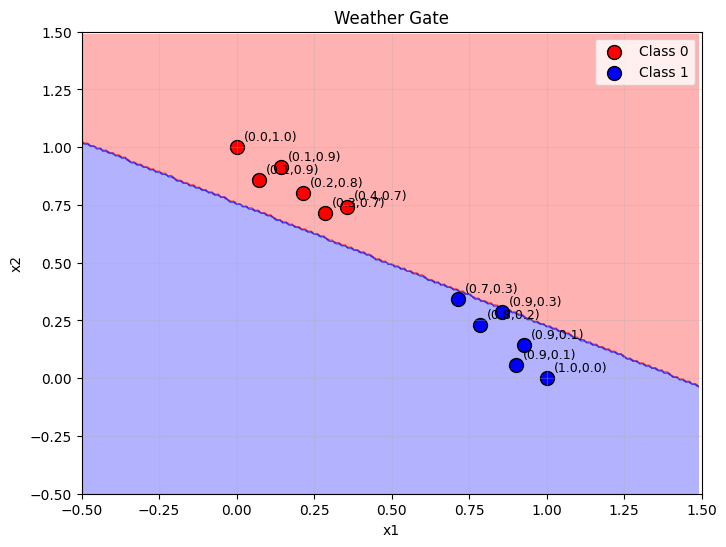


Day mapping to scaled coordinates:
Day1: H=85%, P=1010hPa -> (0.9, 0.3) [Rainy]
Day2: H=45%, P=1025hPa -> (0.3, 0.7) [Non-rainy]
Day3: H=90%, P=1005hPa -> (0.9, 0.1) [Rainy]
Day4: H=30%, P=1030hPa -> (0.1, 0.9) [Non-rainy]
Day5: H=75%, P=1012hPa -> (0.7, 0.3) [Rainy]
Day6: H=40%, P=1028hPa -> (0.2, 0.8) [Non-rainy]
Day7: H=95%, P=1000hPa -> (1.0, 0.0) [Rainy]
Day8: H=35%, P=1032hPa -> (0.1, 0.9) [Non-rainy]
Day9: H=80%, P=1008hPa -> (0.8, 0.2) [Rainy]
Day10: H=50%, P=1026hPa -> (0.4, 0.7) [Non-rainy]
Day11: H=88%, P=1002hPa -> (0.9, 0.1) [Rainy]
Day12: H=25%, P=1035hPa -> (0.0, 1.0) [Non-rainy]

Testing with new weather conditions:
Humidity: 78%, Pressure: 1008hPa -> Rainy
Humidity: 55%, Pressure: 1020hPa -> Non-rainy
Humidity: 92%, Pressure: 998hPa -> Rainy

Model weights: [ 0.44888554  1.26963203 -0.08360265]


In [57]:
# Plot weather classification using existing plot_boundary function
# Scale data to [0,1] range for plotting
X_weather_scaled = (X_weather - X_weather.min(axis=0)) / (X_weather.max(axis=0) - X_weather.min(axis=0))

print("Scaling weather data for plotting:")
print(f"Humidity range: {X_weather[:,0].min()}% to {X_weather[:,0].max()}%")
print(f"Pressure range: {X_weather[:,1].min()} to {X_weather[:,1].max()} hPa")

# Train model on scaled data for visualization
weather_scaled_model = Perceptron(learning_rate=0.01, max_iter=1000)
weather_scaled_model.fit(X_weather_scaled, y_weather_binary)

# Use existing plot_boundary function
plot_boundary(X_weather_scaled, y_weather_binary, weather_scaled_model, "Weather")

# Show mapping
print("\nDay mapping to scaled coordinates:")
for i in range(len(X_weather)):
    weather = "Rainy" if y_weather_binary[i] == 1 else "Non-rainy"
    print(f"Day{i+1}: H={X_weather[i,0]}%, P={X_weather[i,1]}hPa -> ({X_weather_scaled[i,0]:.1f}, {X_weather_scaled[i,1]:.1f}) [{weather}]")

# Test with new weather conditions
print("\nTesting with new weather conditions:")
test_humidity = [78, 55, 92]
test_pressure = [1008, 1020, 998]
test_weather = np.column_stack([test_humidity, test_pressure])

test_predictions = weather_model.predict(test_weather)
for i in range(len(test_weather)):
    weather = "Rainy" if test_predictions[i] == 1 else "Non-rainy"
    print(f"Humidity: {test_humidity[i]}%, Pressure: {test_pressure[i]}hPa -> {weather}")

print(f"\nModel weights: {weather_model.weights}")

## Task # 05

In [61]:
# Create sample medical data for disease diagnosis
# Features: blood pressure (systolic), cholesterol level (mg/dL)
# Labels: 1 = disease, -1 = no disease

# Sample patient data (15 patients)
blood_pressure = np.array([120, 180, 110, 190, 130, 160, 100, 200, 140, 170, 115, 185, 125, 175, 105])  # mmHg
cholesterol = np.array([180, 280, 160, 320, 200, 260, 140, 350, 220, 300, 150, 310, 190, 290, 135])     # mg/dL

# Create feature matrix
X_medical = np.column_stack([blood_pressure, cholesterol])

# Classification rule: High BP (>150) OR High cholesterol (>240) = Disease
# Both normal = No disease
medical_labels = []
for i in range(len(blood_pressure)):
    if blood_pressure[i] > 150 or cholesterol[i] > 240:
        medical_labels.append(1)   # disease
    else:
        medical_labels.append(-1)  # no disease

y_medical = np.array(medical_labels)

print("Medical Diagnosis Data:")
print("Patient | BP(mmHg) | Cholesterol(mg/dL) | Diagnosis")
print("-" * 50)
for i in range(len(blood_pressure)):
    diagnosis = "Disease" if y_medical[i] == 1 else "Healthy"
    print(f"   {i+1:2d}   |   {blood_pressure[i]:3d}    |      {cholesterol[i]:3d}        | {diagnosis}")

print(f"\nFeatures shape: {X_medical.shape}")
print(f"Labels: {y_medical}")

Medical Diagnosis Data:
Patient | BP(mmHg) | Cholesterol(mg/dL) | Diagnosis
--------------------------------------------------
    1   |   120    |      180        | Healthy
    2   |   180    |      280        | Disease
    3   |   110    |      160        | Healthy
    4   |   190    |      320        | Disease
    5   |   130    |      200        | Healthy
    6   |   160    |      260        | Disease
    7   |   100    |      140        | Healthy
    8   |   200    |      350        | Disease
    9   |   140    |      220        | Healthy
   10   |   170    |      300        | Disease
   11   |   115    |      150        | Healthy
   12   |   185    |      310        | Disease
   13   |   125    |      190        | Healthy
   14   |   175    |      290        | Disease
   15   |   105    |      135        | Healthy

Features shape: (15, 2)
Labels: [-1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1]


In [65]:
# Convert labels from {-1, 1} to {0, 1} for existing Perceptron class
y_medical_binary = np.where(y_medical == 1, 1, 0)

print("Converting medical labels:")
print("Original labels (1=disease, -1=healthy):", y_medical)
print("Binary labels (1=disease, 0=healthy):", y_medical_binary)

# Train medical diagnosis classifier
print("\nTraining Medical Diagnosis Classifier...")
medical_model = Perceptron(learning_rate=0.0001, max_iter=1000)
medical_model.fit(X_medical, y_medical_binary)

# Test the model
predictions = medical_model.predict(X_medical)
print("\nMedical Diagnosis Results:")
correct = 0
for i in range(len(X_medical)):
    diagnosis_pred = "Disease" if predictions[i] == 1 else "Healthy"
    diagnosis_actual = "Disease" if y_medical_binary[i] == 1 else "Healthy"
    is_correct = predictions[i] == y_medical_binary[i]
    if is_correct:
        correct += 1
    check = "✓" if is_correct else "✗"
    print(f"Patient {i+1}: BP={X_medical[i,0]}, Chol={X_medical[i,1]} -> {diagnosis_pred} (actual: {diagnosis_actual}) {check}")

accuracy = (correct / len(X_medical)) * 100
print(f"\nAccuracy: {accuracy:.1f}% ({correct}/{len(X_medical)})")

Converting medical labels:
Original labels (1=disease, -1=healthy): [-1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1]
Binary labels (1=disease, 0=healthy): [0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]

Training Medical Diagnosis Classifier...

Medical Diagnosis Results:
Patient 1: BP=120, Chol=180 -> Healthy (actual: Healthy) ✓
Patient 2: BP=180, Chol=280 -> Healthy (actual: Disease) ✗
Patient 3: BP=110, Chol=160 -> Healthy (actual: Healthy) ✓
Patient 4: BP=190, Chol=320 -> Disease (actual: Disease) ✓
Patient 5: BP=130, Chol=200 -> Healthy (actual: Healthy) ✓
Patient 6: BP=160, Chol=260 -> Healthy (actual: Disease) ✗
Patient 7: BP=100, Chol=140 -> Healthy (actual: Healthy) ✓
Patient 8: BP=200, Chol=350 -> Disease (actual: Disease) ✓
Patient 9: BP=140, Chol=220 -> Healthy (actual: Healthy) ✓
Patient 10: BP=170, Chol=300 -> Disease (actual: Disease) ✓
Patient 11: BP=115, Chol=150 -> Healthy (actual: Healthy) ✓
Patient 12: BP=185, Chol=310 -> Disease (actual: Disease) ✓
Patient 13: BP=125, Chol=190 -> He

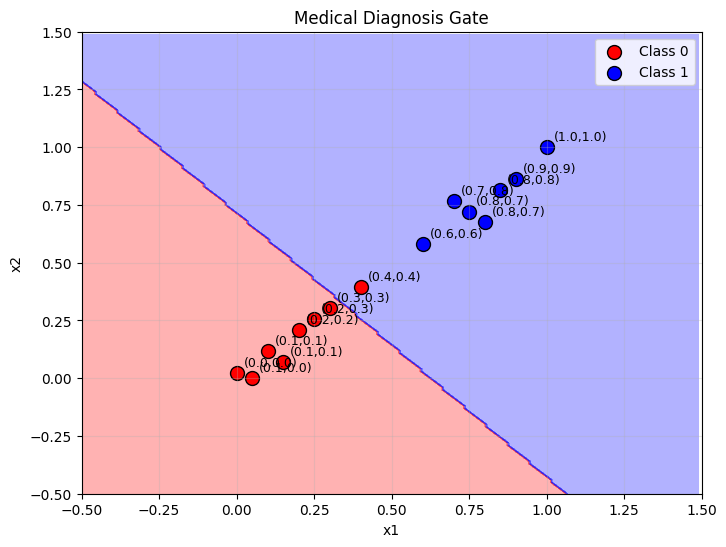


Predictions for new patients:
New Patient 1: BP=130, Cholesterol=200 -> Healthy
New Patient 2: BP=170, Cholesterol=300 -> Healthy
New Patient 3: BP=140, Cholesterol=160 -> Healthy


In [67]:
# Visualize medical diagnosis decision boundary (scaled)
X_medical_scaled = (X_medical - X_medical.min(axis=0)) / (X_medical.max(axis=0) - X_medical.min(axis=0))

# Train model on scaled data for visualization
medical_scaled_model = Perceptron(learning_rate=0.0001, max_iter=1000)
medical_scaled_model.fit(X_medical_scaled, y_medical_binary)

# Use existing plot_boundary function with correct parameter order
plot_boundary(X_medical_scaled, y_medical_binary, medical_scaled_model, "Medical Diagnosis")

# Test with new patient data
new_patients = np.array([
    [130, 200],  # Lower BP, moderate cholesterol - should be healthy
    [170, 300],  # High BP, high cholesterol - should have disease  
    [140, 160]   # Moderate BP, low cholesterol - should be healthy
])

new_patients_scaled = (new_patients - X_medical.min(axis=0)) / (X_medical.max(axis=0) - X_medical.min(axis=0))
new_predictions = medical_model.predict(new_patients_scaled)

print("\nPredictions for new patients:")
for i, (bp, chol) in enumerate(new_patients):
    diagnosis = "Disease" if new_predictions[i] == 1 else "Healthy"
    print(f"New Patient {i+1}: BP={bp}, Cholesterol={chol} -> {diagnosis}")